# Wigner's Surmise

Wigner's surmise is the name given to a function which gives us the PDF of the difference between the two eigenvalues of a 2x2 random matrix. A simplification given here takes a matrix:

\begin{pmatrix}
x_1 & x_3\\
x_3 & x_2
\end{pmatrix}

Where the random variables, $x_i$, are drawn from normal distributions, $x_1$ and $x_2$ with variance 1 and $x_3$ with variance $^1/_2$. Wigner's Surmise in this case is given by (and derived in [this lecture](https://www.youtube.com/watch?v=Je4bU3g_QGk)):

$$\frac{1}{2}x e^{-\frac{x^2}{4}}$$

Here we demonstrate the result using Julia to calculate the eigenvalues of many random matrices of this form and compare the histogram of the results with the function.

In [1]:
using Random, Distributions, LinearAlgebra

In [2]:
h = Float64[]
dist1 = Normal(0, 1)
dist2 = Normal(0, 1/sqrt(2))
for i in 1:1000000
    x1 = rand(dist1)
    x2 = rand(dist1)
    x3 = rand(dist2)
    mat = [x1 x3; x3 x2]
    l1, l2 = eigvals(mat)
    push!(h, abs(l1-l2))
end

In [3]:
wigners_surmise(x) = (1/2)x*exp(-(x^2)/4)

wigners_surmise (generic function with 1 method)

In [4]:
using Plots
gr()
default(leg=false)

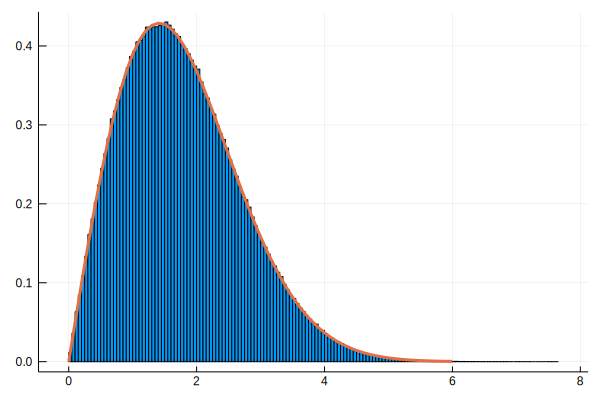

In [5]:
plot(histogram(h, normalize=:pdf))
plot!(0:0.1:6, [wigners_surmise(x) for x=0:0.1:6], lw=3)

_A perfect fit_